In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML, display
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

# FFT Analysis of a Square Wave
Samra Kasim

Computer Architecture EN605.611.8VL2

### FFT
FFT takes a signal and breaks it down into sine waves of different amplitudes and frequencies (i.e., it "converts a time domain representation of a signal into a frequency domain representation"). Therefore, when plotted, the highest amplitude spike corresponds to the frequency of the highest voltage sine signal. The square wave, since it is the summation of sine waves of different frequencies and amplitudes has a downward slope.[1]

The following is an analysis of the Arduino FFT algorithms output after processing two square waves of 250Hz and 75Hz. The sound wave was produced using a frequency function generation app.

<table><tr>
<td> <img src="images/square_wave_250gen.jpg" alt="250hz" style="width: 200px;"/> </td>
<td> <img src="images/square_wave_75gen.jpg" alt="75hz" style="width: 200px;"/> </td>
</tr></table>

In [45]:
f1 = './fft_output_data/fft_output_75hz.csv'
f2 = './fft_output_data/fft_output_250hz.csv'
df1 = pd.read_csv(f1, header=None, sep=' ')
df1 = df1.rename(columns = {0: 'frequency', 1: 'amplitude_75hz'}, inplace = False)
df2 = pd.read_csv(f2, header=None, sep = ' ')
df2 = df2.rename(columns = {0: 'frequency_tmp', 1: 'amplitude_250hz'}, inplace = False)
df2
data = pd.concat([df1, df2], axis=1, join='inner')
data = data.drop(columns=['frequency_tmp'])
data['bin'] = data.index
display(data)

,frequency,amplitude_75hz,amplitude_250hz,bin
0,0.0,12857.6,12906.2,0
1,19.5,5501.9,5525.2,1
2,39.1,9.0,14.8,2
3,58.6,13.1,13.9,3
4,78.1,7.5,8.7,4
...,...,...,...,...
123,2402.3,2.4,5.8,123
124,2421.9,1.7,11.5,124
125,2441.4,4.0,16.4,125
126,2460.9,1.8,3.4,126


### Frequency Bin Width
Given the sampling frequency ($f_s$) and the number of samples ($N$), the below is used to determine frequency bin  width ($d_f$) : 
$$ d_f = \dfrac{f_s}{N}  $$

In our example, $d_f = \dfrac{5000}{256} = 19.53125$ and the result is $N/2$ or $128$ bins

### Amplitude
The amplitude represents the weight of a harmonic, i.e, the harmonics with greater weights have a higher amplitude.[2]


## Analysis

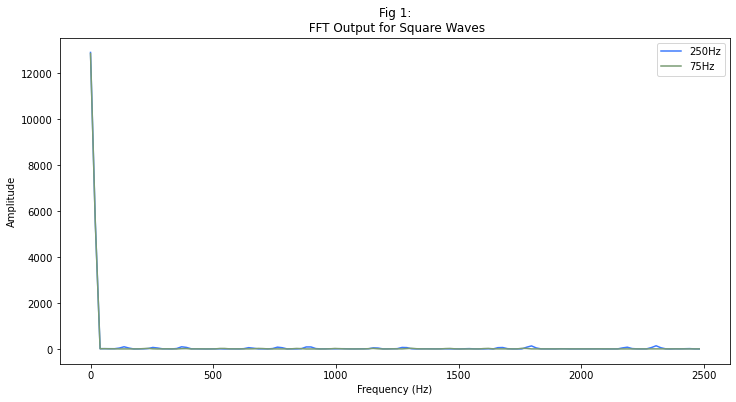

In [46]:
# plotting points
plt.plot(data['frequency'], data['amplitude_250hz'], label='250Hz', color='xkcd:lightish blue')
plt.plot(data['frequency'], data['amplitude_75hz'], label='75Hz', color='xkcd:grey green')
# add x-label
plt.xlabel('Frequency (Hz)')
# add y-label
plt.ylabel('Amplitude')
# plot title
plt.title('Fig 1:\n FFT Output for Square Waves')
# show legend
plt.legend()
#show graph

### Analog to Digital Converter (ADC)
The first frequency (bin 0) represents DC current, which is the mean of the signal and since this square wave is centered at 0, the first frequency bin is 0Hz [3]

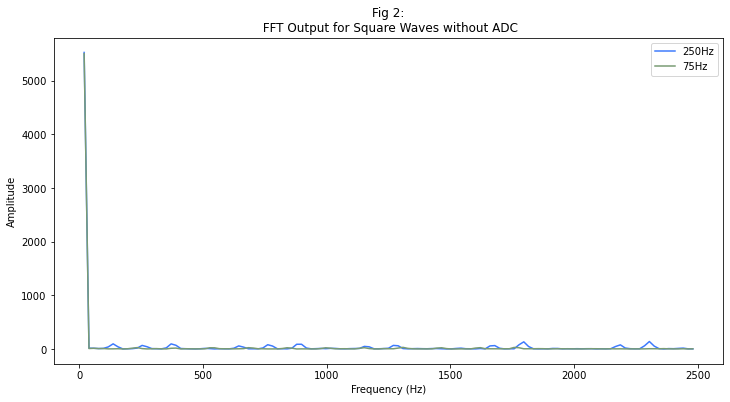

In [47]:
# drop ADC row from dataframe
data = data.drop([0])
# plotting points
plt.plot(data['frequency'], data['amplitude_250hz'], label='250Hz', color='xkcd:lightish blue')
plt.plot(data['frequency'], data['amplitude_75hz'], label='75Hz', color='xkcd:grey green')
# add x-label
plt.xlabel('Frequency (Hz)')
# add y-label
plt.ylabel('Amplitude')
# plot title
plt.title('Fig 2:\n FFT Output for Square Waves without ADC')
# show legend
plt.legend()
#show graph

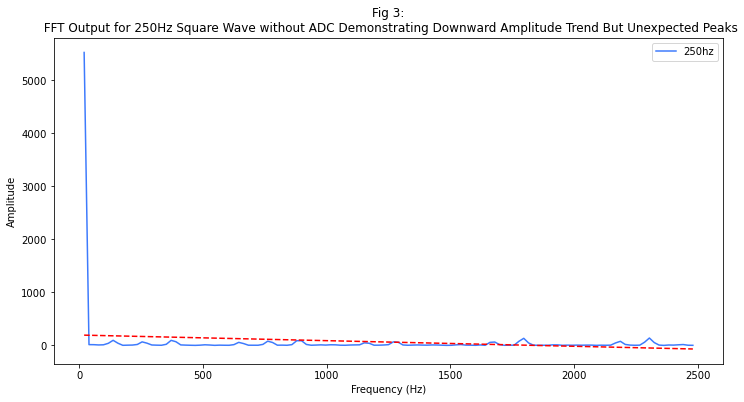

In [48]:
# plotting points
plt.plot(data['frequency'], data['amplitude_250hz'], label='250hz', color='xkcd:lightish blue')
# calculate trendline
z = np.polyfit(data['frequency'], data['amplitude_250hz'], 1)
p = np.poly1d(z)
plt.plot(data['frequency'],p(data['frequency']),"r--")
# add x-label
plt.xlabel('Frequency (Hz)')
# add y-label
plt.ylabel('Amplitude')
# plot title
plt.title('Fig 3:\n FFT Output for 250Hz Square Wave without ADC Demonstrating Downward Amplitude Trend But Unexpected Peaks')
# show legend
plt.legend()
#show graph


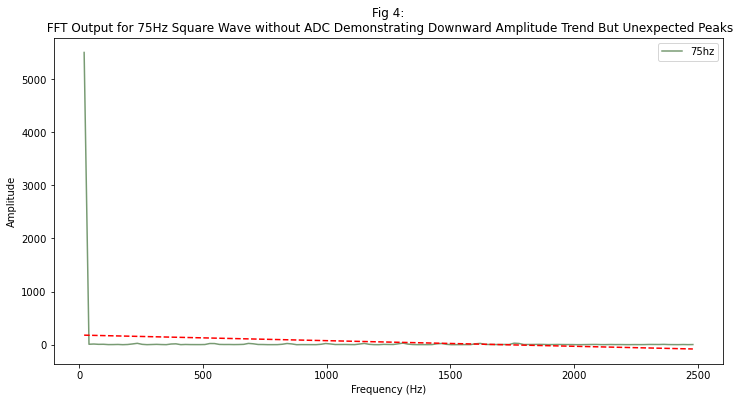

In [49]:
# plotting points
plt.plot(data['frequency'], data['amplitude_75hz'], label='75hz', color='xkcd:grey green')
# calculate trendline
z = np.polyfit(data['frequency'], data['amplitude_75hz'], 1)
p = np.poly1d(z)
plt.plot(data['frequency'],p(data['frequency']),"r--")
# add x-label
plt.xlabel('Frequency (Hz)')
# add y-label
plt.ylabel('Amplitude')
# plot title
plt.title('Fig 4:\n FFT Output for 75Hz Square Wave without ADC Demonstrating Downward Amplitude Trend But Unexpected Peaks')
# show legend
plt.legend()
#show graph

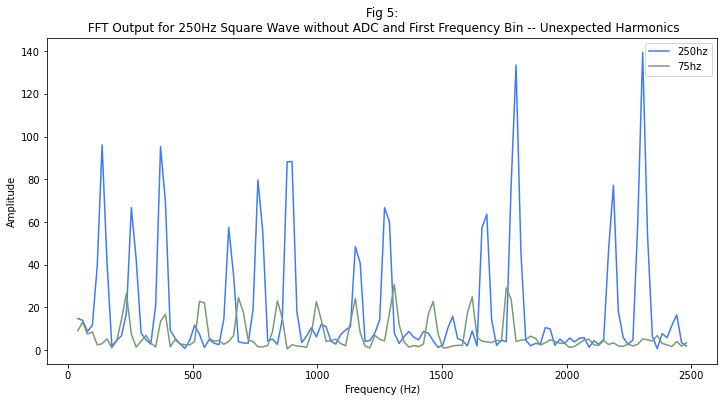

In [50]:
# drop first frequency
data = data.drop([1])
# plotting points
plt.plot(data['frequency'], data['amplitude_250hz'], label='250hz', color='xkcd:lightish blue')
plt.plot(data['frequency'], data['amplitude_75hz'], label='75hz', color='xkcd:grey green')
# add x-label
plt.xlabel('Frequency (Hz)')
# add y-label
plt.ylabel('Amplitude')
# plot title
plt.title('Fig 5:\n FFT Output for 250Hz Square Wave without ADC and First Frequency Bin -- Unexpected Harmonics')
# show legend
plt.legend()
#show graph

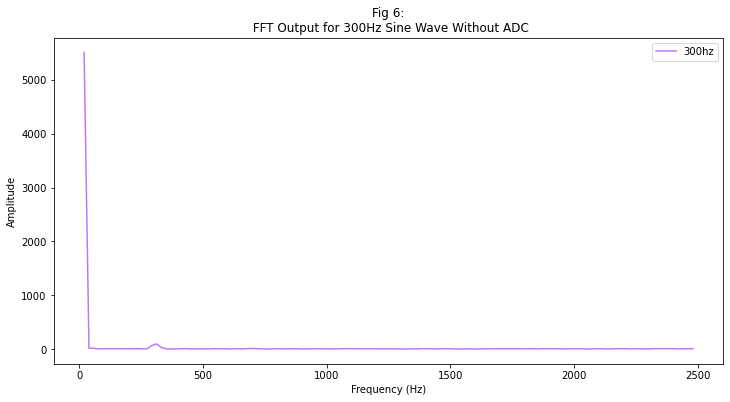

In [51]:
# A sine wave at 300 Hz for comparison
f3 = './fft_output_data/fft_output_sin_300hz.csv'
df3 = pd.read_csv(f3, header=None, sep=' ')
df3 = df3.rename(columns = {0: 'frequency', 1: 'amplitude_300hz'}, inplace = False)
df3 = df3.drop([0])
# plotting points
plt.plot(df3['frequency'], df3['amplitude_300hz'], label='300hz', color='xkcd:light purple')
# add x-label
plt.xlabel('Frequency (Hz)')
# add y-label
plt.ylabel('Amplitude')
# plot title
plt.title('Fig 6:\n FFT Output for 300Hz Sine Wave Without ADC')
# show legend
plt.legend()
#show graph

<img src="images/sine_wave_300gen.jpg" alt="250hz" style="width: 200px;"/>

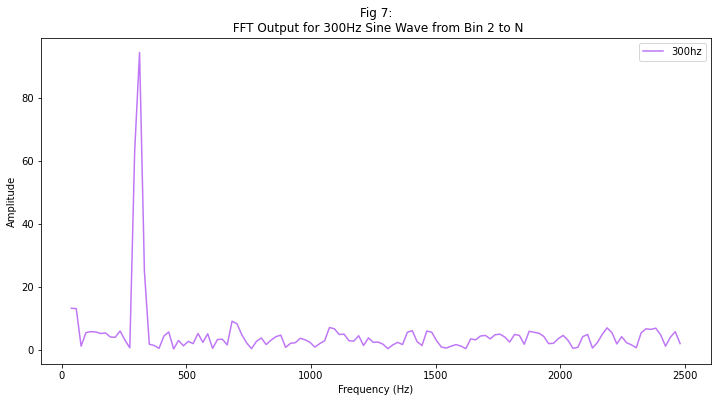

In [52]:
# drop first index
df3 = df3.drop([1])
# plotting points
plt.plot(df3['frequency'], df3['amplitude_300hz'], label='300hz', color='xkcd:light purple')
# add x-label
plt.xlabel('Frequency (Hz)')
# add y-label
plt.ylabel('Amplitude')
# plot title
plt.title('Fig 7:\n FFT Output for 300Hz Sine Wave from Bin 2 to N')
# show legend
plt.legend()
#show graph

Sources:

* [1] https://download.ni.com/evaluation/pxi/Understanding%20FFTs%20and%20Windowing.pdf
* [2] https://dsp.stackexchange.com/questions/8317/fft-amplitude-or-magnitude
* [3] https://dsp.stackexchange.com/questions/62286/fft-giving-a-huge-magnitude-of-first-frequency-and-pretty-much-zero-after-that
* [4] https://en.wikipedia.org/wiki/Fourier_transform#/media/File:Fourier_transform_time_and_frequency_domains_(small).gif
    